# Entity Resolution: Source and Target

- Once we have the source identified, can we connect same source to each other, then group by source to see all/each predictions per source?

> `notebook_experiments/sequence_labelling-prediction_sentence.ipynb` because we extract the prediction properties: source, target, date, and outcome.

In [1]:
import os
import sys

import pandas as pd

from tqdm import tqdm

from pyjedai.datamodel import Data
from pyjedai.joins import EJoin, TopKJoin

notebook_dir = os.getcwd()

sys.path.append(os.path.join(notebook_dir, '../'))

from data_processing import DataProcessing
from feature_extraction import SpacyFeatureExtraction

/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/pyjedai/joins.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
pd.set_option('max_colwidth', 800)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', 40)
# pd.set_option('display.max_rows', None)

In [3]:
base_data_path = DataProcessing.load_base_data_path(notebook_dir)

In [4]:
extract_prediction_properties_path = "extract_prediction_properties/"
extract_prediction_properties_full_path = os.path.join(base_data_path, extract_prediction_properties_path, 'extracted_pps-v1.csv')
df = DataProcessing.load_from_file(extract_prediction_properties_full_path, 'csv', sep=',')
df

,Prediction Sentence,Raw Response,Model Name,No Property,Source,Target,Date,Outcome
0,Professor Thompson forecasts that the graduation rate at Harvard University will drop in 2027.,"{0: [""forecasts"", ""that"", ""the"", ""graduation"", ""rate"", ""at"", ""will"", ""in""], 1: [""Professor Thompson""], 2: [""Harvard University""], 3: [""2027""], 4: [""drop""]}",openai/gpt-oss-120b,"forecasts, that, the, graduation, rate, at, will, in",Professor Thompson,Harvard University,2027,drop
1,"Economist Dr. Sarah Lee predicts on 12/31/2027, the consumer confidence index may rise.","{0: [""predicts"", ""on"", ""the""], 1: [""Economist Dr. Sarah Lee""], 2: [""consumer confidence index""], 3: [""12/31/2027""], 4: [""may rise""]}",openai/gpt-oss-120b,"predicts, on, the",Economist Dr. Sarah Lee,consumer confidence index,12/31/2027,may rise
2,"According to a fitness expert, the nutritional intake at community centers would fall in 21 August 2024.","{0: [""According"", ""to"", ""a"", ""the"", ""in""], 1: [""fitness expert""], 2: [""nutritional intake at community centers""], 3: [""21 August 2024""], 4: [""would fall""]}",openai/gpt-oss-120b,"According, to, a, the, in",fitness expert,nutritional intake at community centers,21 August 2024,would fall
3,"The nutritional awareness in Europe should stay the same in 2028, according to a research report.","{""0"": [""The"", ""in"", ""should"", ""the"", ""in"", ""according"", ""to""], ""1"": [""a research report""], ""2"": [""nutritional awareness in Europe""], ""3"": [""2028""], ""4"": [""stay the same""]}",openai/gpt-oss-120b,"The, in, should, the, in, according, to",a research report,nutritional awareness in Europe,2028,stay the same
4,"Coach Sofia Rodriguez predicts on 08/10/2028, the win ratio at the Boston Celtics may rise.","{0: [""predicts"", ""on"", ""the"", ""at""], 1: [""Coach Sofia Rodriguez""], 2: [""Boston Celtics""], 3: [""08/10/2028""], 4: [""win ratio may rise""]}",openai/gpt-oss-120b,"predicts, on, the, at",Coach Sofia Rodriguez,Boston Celtics,08/10/2028,win ratio may rise
5,"Analyst Kevin Jackson predicts on 21 August 2024, the score average at the New England Patriots may rise.","{0: [""predicts"", ""on"", ""the"", ""at"", ""the""], 1: [""Analyst Kevin Jackson""], 2: [""New England Patriots""], 3: [""21 August 2024""], 4: [""score average may rise""]}",openai/gpt-oss-120b,"predicts, on, the, at, the",Analyst Kevin Jackson,New England Patriots,21 August 2024,score average may rise
6,The National Oceanic and Atmospheric Administration forecasts that the precipitation levels at New Orleans may decrease in 2024-08-21.,"{0: [""The"", ""forecasts"", ""that"", ""the"", ""may"", ""in""], 1: [""National Oceanic and Atmospheric Administration""], 2: [""precipitation levels at New Orleans""], 3: [""2024-08-21""], 4: [""decrease""]}",openai/gpt-oss-120b,"The, forecasts, that, the, may, in",National Oceanic and Atmospheric Administration,precipitation levels at New Orleans,2024-08-21,decrease
7,The sports analyst from ESPN anticipates that the scoring average at the Los Angeles Lakers will potentially decrease in 2024 of Q3.,"{0: [""The"", ""anticipates"", ""that"", ""the"", ""will"", ""in"", ""of""], 1: [""sports analyst from ESPN""], 2: [""scoring average at the Los Angeles Lakers""], 3: [""2024 Q3""], 4: [""potentially decrease""]}",openai/gpt-oss-120b,"The, anticipates, that, the, will, in, of",sports analyst from ESPN,scoring average at the Los Angeles Lakers,2024 Q3,potentially decrease
8,"The stock price at Amazon should stay same in 2024/08/21, according to Morgan Stanley.","{0: [""The"", ""at"", ""should"", ""in"", ""according"", ""to""], 1: [""Morgan Stanley""], 2: [""Amazon""], 3: [""2024/08/21""], 4: [""stock price"", ""stay same""]}",openai/gpt-oss-120b,"The, at, should, in, according, to",Morgan Stanley,Amazon,2024/08/21,"stock price, stay same"
9,"The transaction will have a positive impact of around EUR2m on earnings , which Ruukki will recognize during the fourth quarter of this

In [5]:
import spacy
from date_spacy import find_dates

# Load your desired spaCy model
nlp = spacy.blank('en')

# Add the component to the pipeline
nlp.add_pipe('find_dates')

for date_value in df['Date'].values:
    print(date_value)
    doc = nlp(date_value)
    for ent in doc.ents:
        if ent.label_ == "DATE":
            print(f"Text: {ent.text} -> Parsed Date: {ent._.date}")

2027
12/31/2027
Text: 12/31/2027 -> Parsed Date: 2027-12-31 00:00:00
21 August 2024
Text: 21 August 2024 -> Parsed Date: 2024-08-21 00:00:00
2028
08/10/2028
Text: 08/10/2028 -> Parsed Date: 2028-08-10 00:00:00
21 August 2024
Text: 21 August 2024 -> Parsed Date: 2024-08-21 00:00:00
2024-08-21
Text: 2024-08-21 -> Parsed Date: 2024-08-21 00:00:00
2024 Q3
2024/08/21
Text: 2024/08/21 -> Parsed Date: 2024-08-21 00:00:00
fourth quarter of this year
Spring 2024
21 August 2024
Text: 21 August 2024 -> Parsed Date: 2024-08-21 00:00:00
August 22, 2024
Text: August 22, 2024 -> Parsed Date: 2024-08-22 00:00:00
November 10, 2026
Text: November 10, 2026 -> Parsed Date: 2026-11-10 00:00:00
Q3 of 2029
2024-09-01
Text: 2024-09-01 -> Parsed Date: 2024-09-01 00:00:00
2024-08-21
Text: 2024-08-21 -> Parsed Date: 2024-08-21 00:00:00
08/21/2024
Text: 08/21/2024 -> Parsed Date: 2024-08-21 00:00:00
01/01/2025
Text: 01/01/2025 -> Parsed Date: 2025-01-01 00:00:00
2029 of Q3
21/08/2024
Text: 21/08/2024 -> Parsed Da

In [6]:
df['Source'].value_counts()

Source
Morgan Stanley                                     2
Professor Thompson                                 1
policy analyst David Chen                          1
Financial analyst Olivia Brown                     1
sports analyst Sarah Johnson                       1
The Centers for Disease Control and Prevention     1
Financial Analyst James Lee                        1
Coach Brad Stevens                                 1
college student Samantha Brown                     1
Ms. Sophia Chen                                    1
Policy analyst David Lee                           1
International Energy Agency                        1
Emily Chen                                         1
The Brookings Institution                          1
American Heart Association                         1
JP Morgan Chase                                    1
Marketing Director Sarah Lee                       1
Economist Dr. Sarah Lee                            1
sports expert Lisa Kim                 

In [7]:
df['Target'].value_counts()

Target
Amazon                                                              3
Boston Celtics                                                      2
Harvard University                                                  1
approval ratings for the new president                              1
Microsoft Corporation                                               1
Los Angeles Lakers                                                  1
health screening participation                                      1
the stock market volatility                                         1
the number of affordable housing units in urban areas               1
FC Barcelona                                                        1
renewable energy investments at Tesla                               1
investment in renewable energy projects at emerging markets         1
net profit at Amazon                                                1
Microsoft                                                           1
the consumer 

In [8]:
source_entity_sfe = SpacyFeatureExtraction(df, 'Source')
target_entity_sfe = SpacyFeatureExtraction(df, 'Target')
date_entity_sfe = SpacyFeatureExtraction(df, 'Date')

In [9]:
entity_spacy_embeddings_df = source_entity_sfe.sentence_embeddings_extraction(attach_to_df=True)
entity_spacy_embeddings_df = target_entity_sfe.sentence_embeddings_extraction(attach_to_df=True)
entity_spacy_embeddings_df = date_entity_sfe.sentence_embeddings_extraction(attach_to_df=True)
entity_spacy_embeddings_df.head(7)

100%|██████████| 33/33 [00:00<00:00, 634.29it/s]


,Prediction Sentence,Raw Response,Model Name,No Property,Source,Target,Date,Outcome,Source Embedding,Target Embedding,Date Embedding
0,Professor Thompson forecasts that the graduation rate at Harvard University will drop in 2027.,"{0: [""forecasts"", ""that"", ""the"", ""graduation"", ""rate"", ""at"", ""will"", ""in""], 1: [""Professor Thompson""], 2: [""Harvard University""], 3: [""2027""], 4: [""drop""]}",openai/gpt-oss-120b,"forecasts, that, the, graduation, rate, at, will, in",Professor Thompson,Harvard University,2027,drop,"[-0.188665, 0.1446445, 0.0038895002, 0.18792, 0.22763, -0.094450004, -0.14755, -0.44406, -0.264386, 1.753185, -0.26647502, -0.282575, -0.018336501, -0.357095, 0.0034445003, -0.22634, 0.12990999, 0.16849351, -0.0964185, -0.2057645, 0.27906, 0.037766505, -0.14851502, -0.155405, 0.1385, -0.060122497, -0.50584, 0.2894449, 0.11227, 0.601415, -0.1313875, 0.289498, 0.091856, -0.004610002, 0.088228, -0.13734101, 0.34717, -0.0898425, -0.48817497, -0.270127, 0.454675, 0.058185004, -0.093779996, 0.028038003, 0.1701355, 0.27929002, -0.035745002, -0.53903997, 0.589995, -0.3058045, -0.004505001, 0.22073498, 0.15529451, -0.239965, 0.006585002, -0.378615, -0.078845, 0.073764995, -0.021467496, -0.50457, -0.399925, 0.19211799, 0.206705, -0.07610899, 0.40308, -0.35635, -0.25491, 0.1098485, -0.034459, 0.2...","[0.099470004, -0.04451, 0.200515, -0.251205, 0.1594835, 0.18635501, -0.38302, -0.13836, 0.011269998, 1.6190699, -0.78595, -0.1247525, 0.162835, -0.045331504, 0.0764835, 0.262195, 0.27622002, 0.99731505, 0.136335, 0.090129495, 0.10260551, -0.010790001, 0.077796005, -0.42715248, 0.0716382, 0.12852494, -0.76647, 0.367905, -0.27765, 0.540655, 0.071162, 0.28092, 0.270875, 0.01142, 0.03279, -0.24922001, -0.0146285, 0.22773, -0.205145, 0.221955, 0.26246297, 0.00987765, 0.330375, 0.22415501, 0.041755006, -0.12649399, 0.109193996, -0.19925, 0.149506, -0.62591004, -0.71523, 0.48673, 0.490955, -0.50111, 0.110424995, -0.454765, 0.25732, -0.1459865, -0.052837502, 0.028911002, -0.47153997, -0.054984495, 0.508345, -0.2554, 0.223295, 0.040285006, -0.39306998, 0.57959497, 0.073845, 0.62827504, -0.29199...","[0.28632, 0.094606, -0.069178, -0.066155, -0.46179, 0.16445, -0.24562, 0.68204, 0.40446, -0.55795, 0.10465, 0.61898, -0.17868, 0.30247, -0.32866, 0.41336, -0.032987, 0.05138, 0.41541, -0.42327, -0.30737, 0.11848, 0.75646, -0.18477, -0.013281, -0.042375, 0.029636, -0.16725, 0.067148, 0.29896, -0.51287, 0.17672, 0.27187, -0.14721, 0.061649, -0.29886, 0.99557, 0.45641, 0.25692, 0.14256, -0.28217, 0.38345, 0.27503, 0.35356, -0.1045, -0.35854, -0.062603, 0.061159, -0.083066, -0.40006, -0.0050766, -0.069696, -0.1192, -0.93225, 0.35577, 0.01226, 0.15523, -0.091483, -0.12625, -0.60333, -0.83867, -0.31457, -0.14536, 0.49801, -0.44951, 0.10032, -0.22962, -0.18359, -0.16568, -0.11998, 0.049328, -0.50568, -0.14398, 0.034021, 0.10204, 0.22563, 0.30992, 0.2207, 0.45122, 0.27443, 0.3697, 0.095729, -0..."
1,"Economist Dr. Sarah Lee predicts on 12/31/2027, the consumer confidence index may rise.","{0: [""predicts"", ""on"", ""the""], 1: [""Economist Dr. Sarah Lee""], 2: [""consumer confidence index""], 3: [""12/31/2027""], 4: [""may rise""]}",openai/gpt-oss-120b,"predicts, on, the",Economist Dr. Sarah Lee,consumer confidence index,12/31/2027,may rise,"[-0.21245393, 0.39729, 0.13133174, 0.19134, -0.025871996, -0.07121075, 0.14715925, -0.3874575, -0.047730498, 1.078005, -0.6622425, -0.49576747, -0.0944815, -0.080365, 0.0010289997, -0.057098992, -0.041406, 0.3165325, 0.026434902, 0.022253752, 0.22625774, 0.42867073, -0.0061030015, -0.31069225, -0.29461247, -0.08886026, -0.3003075, 0.109264, -0.0649985, 0.041077003, 0.0210955, 0.30563673, 0.0695625, 0.124184996, -0.1984975, -0.05663575, -0.0073283226, 0.0940875, -0.56146, -0.3283481, 0.087045, -0.09902251, -0.09216525, 0.1872, -0.004286999, 0.20872676, -0.029001698, -0.44279647, 0.5283825, -0.19857284, -0.079177245, 0.33917397, 0.05478999, -0.271442, -0.09566001, -0.07254, -0.2101145, 0.078831606, 0

In [10]:
source_entity_sfe.extract_ner_features(disable_components=[])

33it [00:00, 1626.08it/s]

Spacy Doc (0):  Professor Thompson
Spacy Doc (1):  Economist Dr. Sarah Lee
Spacy Doc (2):  fitness expert
Spacy Doc (3):  a research report


,Sentence,Term,NER Label,Unique NER Label,Start Char,End Char
0,Professor Thompson,Thompson,PERSON,PERSON_1,10,18
1,,,,,,
2,Economist Dr. Sarah Lee,Sarah Lee,PERSON,PERSON_2,14,23
3,,,,,,
4,,,,,,
...,...,...,...,...,...,...
58,,,,,,
59,Financial analyst Olivia Brown,Olivia Brown,PERSON,PERSON_19,18,30
60,,,,,,
61,European Central Bank,European Central Bank,ORG,ORG_11,0,21


In [11]:
target_entity_sfe.extract_ner_features(disable_components=[])

33it [00:00, 1519.41it/s]

Spacy Doc (0):  Harvard University
Spacy Doc (1):  consumer confidence index
Spacy Doc (2):  nutritional intake at community centers
Spacy Doc (3):  nutritional awareness in Europe


,Sentence,Term,NER Label,Unique NER Label,Start Char,End Char
0,Harvard University,Harvard University,ORG,ORG_1,0,18
1,,,,,,
2,,,,,,
3,,,,,,
4,nutritional awareness in Europe,Europe,LOC,LOC_1,25,31
5,,,,,,
6,Boston Celtics,Boston Celtics,ORG,ORG_2,0,14
7,,,,,,
8,New England Patriots,New England Patriots,ORG,ORG_3,0,20
9,,,,,,


In [12]:
source_entity_sfe.extract_pos_features(disable_components=[])

['Professor Thompson', 'Economist Dr. Sarah Lee', 'fitness expert', 'a research report', 'Coach Sofia Rodriguez', 'Analyst Kevin Jackson', 'National Oceanic and Atmospheric Administration', 'sports analyst from ESPN', 'Morgan Stanley', 'Ruukki', "miscellaneous college student's", 'Research Advisor David Lee', 'Research Advisor Michael Brown', 'Senator Emily Patel', 'Senior Level Executive Emily Chen', 'sports expert Lisa Kim', 'Marketing Director Sarah Lee', 'policy analyst David Chen', 'JP Morgan Chase', 'American Heart Association', 'The Brookings Institution', 'Morgan Stanley', 'Emily Chen', 'International Energy Agency', 'Policy analyst David Lee', 'Ms. Sophia Chen', 'college student Samantha Brown', 'Coach Brad Stevens', 'Financial Analyst James Lee', 'The Centers for Disease Control and Prevention', 'sports analyst Sarah Johnson', 'Financial analyst Olivia Brown', 'European Central Bank']
['Professor Thompson', 'Economist Dr. Sarah Lee', 'fitness expert', 'a research report', 'Co

33it [00:00, 1441.75it/s]

Spacy Doc (0):  Professor Thompson
Spacy Doc (1):  Economist Dr. Sarah Lee
Spacy Doc (2):  fitness expert
Spacy Doc (3):  a research report


[['Professor', 'Thompson'],
 ['PROPN', 'PROPN'],
 ['PROPN_1', 'PROPN_2'],
 ['Professor', 'Thompson'],
 ['compound', 'ROOT'],
 [False, False],
 ['Economist', 'Dr.', 'Sarah', 'Lee'],
 ['NOUN', 'PROPN', 'PROPN', 'PROPN'],
 ['NOUN_1', 'PROPN_1', 'PROPN_2', 'PROPN_3'],
 ['economist', 'Dr.', 'Sarah', 'Lee'],
 ['compound', 'compound', 'compound', 'ROOT'],
 [False, False, False, False],
 ['fitness', 'expert'],
 ['NOUN', 'NOUN'],
 ['NOUN_1', 'NOUN_2'],
 ['fitness', 'expert'],
 ['compound', 'ROOT'],
 [False, False],
 ['a', 'research', 'report'],
 ['DET', 'NOUN', 'NOUN'],
 ['DET_1', 'NOUN_1', 'NOUN_2'],
 ['a', 'research', 'report'],
 ['det', 'compound', 'ROOT'],
 [True, False, False],
 ['Coach', 'Sofia', 'Rodriguez'],
 ['PROPN', 'PROPN', 'PROPN'],
 ['PROPN_1', 'PROPN_2', 'PROPN_3'],
 ['Coach', 'Sofia', 'Rodriguez'],
 ['compound', 'compound', 'ROOT'],
 [False, False, False],
 ['Analyst', 'Kevin', 'Jackson'],
 ['PROPN', 'PROPN', 'PROPN'],
 ['PROPN_1', 'PROPN_2', 'PROPN_3'],
 ['Analyst', 'Kevin', 'J

In [13]:
target_entity_sfe.extract_pos_features(disable_components=[])

['Harvard University', 'consumer confidence index', 'nutritional intake at community centers', 'nutritional awareness in Europe', 'Boston Celtics', 'New England Patriots', 'precipitation levels at New Orleans', 'scoring average at the Los Angeles Lakers', 'Amazon', 'earnings', 'GPA', 'goal average at Barcelona', 'graduation rates at Harvard University', "the defense spending at her state's military bases", 'Amazon', 'touchdown rate at the New England Patriots', 'sales of electric vehicles', 'approval ratings for the new president', 'Amazon', 'the average physical activity levels at rural clinics in America', 'the consumer confidence in the retail sector', 'Microsoft', 'net profit at Amazon', 'investment in renewable energy projects at emerging markets', 'renewable energy investments at Tesla', 'FC Barcelona', 'the number of affordable housing units in urban areas', 'Boston Celtics', 'the stock market volatility', 'health screening participation', 'Los Angeles Lakers', 'Microsoft Corpor

33it [00:00, 1444.39it/s]

Spacy Doc (0):  Harvard University
Spacy Doc (1):  consumer confidence index
Spacy Doc (2):  nutritional intake at community centers
Spacy Doc (3):  nutritional awareness in Europe


[['Harvard', 'University'],
 ['PROPN', 'PROPN'],
 ['PROPN_1', 'PROPN_2'],
 ['Harvard', 'University'],
 ['compound', 'ROOT'],
 [False, False],
 ['consumer', 'confidence', 'index'],
 ['NOUN', 'NOUN', 'NOUN'],
 ['NOUN_1', 'NOUN_2', 'NOUN_3'],
 ['consumer', 'confidence', 'index'],
 ['compound', 'compound', 'ROOT'],
 [False, False, False],
 ['nutritional', 'intake', 'at', 'community', 'centers'],
 ['ADJ', 'NOUN', 'ADP', 'NOUN', 'NOUN'],
 ['ADJ_1', 'NOUN_1', 'ADP_1', 'NOUN_2', 'NOUN_3'],
 ['nutritional', 'intake', 'at', 'community', 'center'],
 ['amod', 'ROOT', 'prep', 'compound', 'pobj'],
 [False, False, True, False, False],
 ['nutritional', 'awareness', 'in', 'Europe'],
 ['ADJ', 'NOUN', 'ADP', 'PROPN'],
 ['ADJ_1', 'NOUN_1', 'ADP_1', 'PROPN_1'],
 ['nutritional', 'awareness', 'in', 'Europe'],
 ['amod', 'ROOT', 'prep', 'pobj'],
 [False, False, True, False],
 ['Boston', 'Celtics'],
 ['PROPN', 'PROPN'],
 ['PROPN_1', 'PROPN_2'],
 ['Boston', 'Celtics'],
 ['compound', 'ROOT'],
 [False, False],
 ['

In [14]:
from pyphonetics import Soundex # https://github.com/Lilykos/pyphonetics
soundex = Soundex()

soundex.phonetics('Rupert')

'R163'

In [15]:
entity_spacy_embeddings_df.head(3)

,Prediction Sentence,Raw Response,Model Name,No Property,Source,Target,Date,Outcome,Source Embedding,Target Embedding,Date Embedding
0,Professor Thompson forecasts that the graduation rate at Harvard University will drop in 2027.,"{0: [""forecasts"", ""that"", ""the"", ""graduation"", ""rate"", ""at"", ""will"", ""in""], 1: [""Professor Thompson""], 2: [""Harvard University""], 3: [""2027""], 4: [""drop""]}",openai/gpt-oss-120b,"forecasts, that, the, graduation, rate, at, will, in",Professor Thompson,Harvard University,2027,drop,"[-0.188665, 0.1446445, 0.0038895002, 0.18792, 0.22763, -0.094450004, -0.14755, -0.44406, -0.264386, 1.753185, -0.26647502, -0.282575, -0.018336501, -0.357095, 0.0034445003, -0.22634, 0.12990999, 0.16849351, -0.0964185, -0.2057645, 0.27906, 0.037766505, -0.14851502, -0.155405, 0.1385, -0.060122497, -0.50584, 0.2894449, 0.11227, 0.601415, -0.1313875, 0.289498, 0.091856, -0.004610002, 0.088228, -0.13734101, 0.34717, -0.0898425, -0.48817497, -0.270127, 0.454675, 0.058185004, -0.093779996, 0.028038003, 0.1701355, 0.27929002, -0.035745002, -0.53903997, 0.589995, -0.3058045, -0.004505001, 0.22073498, 0.15529451, -0.239965, 0.006585002, -0.378615, -0.078845, 0.073764995, -0.021467496, -0.50457, -0.399925, 0.19211799, 0.206705, -0.07610899, 0.40308, -0.35635, -0.25491, 0.1098485, -0.034459, 0.2...","[0.099470004, -0.04451, 0.200515, -0.251205, 0.1594835, 0.18635501, -0.38302, -0.13836, 0.011269998, 1.6190699, -0.78595, -0.1247525, 0.162835, -0.045331504, 0.0764835, 0.262195, 0.27622002, 0.99731505, 0.136335, 0.090129495, 0.10260551, -0.010790001, 0.077796005, -0.42715248, 0.0716382, 0.12852494, -0.76647, 0.367905, -0.27765, 0.540655, 0.071162, 0.28092, 0.270875, 0.01142, 0.03279, -0.24922001, -0.0146285, 0.22773, -0.205145, 0.221955, 0.26246297, 0.00987765, 0.330375, 0.22415501, 0.041755006, -0.12649399, 0.109193996, -0.19925, 0.149506, -0.62591004, -0.71523, 0.48673, 0.490955, -0.50111, 0.110424995, -0.454765, 0.25732, -0.1459865, -0.052837502, 0.028911002, -0.47153997, -0.054984495, 0.508345, -0.2554, 0.223295, 0.040285006, -0.39306998, 0.57959497, 0.073845, 0.62827504, -0.29199...","[0.28632, 0.094606, -0.069178, -0.066155, -0.46179, 0.16445, -0.24562, 0.68204, 0.40446, -0.55795, 0.10465, 0.61898, -0.17868, 0.30247, -0.32866, 0.41336, -0.032987, 0.05138, 0.41541, -0.42327, -0.30737, 0.11848, 0.75646, -0.18477, -0.013281, -0.042375, 0.029636, -0.16725, 0.067148, 0.29896, -0.51287, 0.17672, 0.27187, -0.14721, 0.061649, -0.29886, 0.99557, 0.45641, 0.25692, 0.14256, -0.28217, 0.38345, 0.27503, 0.35356, -0.1045, -0.35854, -0.062603, 0.061159, -0.083066, -0.40006, -0.0050766, -0.069696, -0.1192, -0.93225, 0.35577, 0.01226, 0.15523, -0.091483, -0.12625, -0.60333, -0.83867, -0.31457, -0.14536, 0.49801, -0.44951, 0.10032, -0.22962, -0.18359, -0.16568, -0.11998, 0.049328, -0.50568, -0.14398, 0.034021, 0.10204, 0.22563, 0.30992, 0.2207, 0.45122, 0.27443, 0.3697, 0.095729, -0..."
1,"Economist Dr. Sarah Lee predicts on 12/31/2027, the consumer confidence index may rise.","{0: [""predicts"", ""on"", ""the""], 1: [""Economist Dr. Sarah Lee""], 2: [""consumer confidence index""], 3: [""12/31/2027""], 4: [""may rise""]}",openai/gpt-oss-120b,"predicts, on, the",Economist Dr. Sarah Lee,consumer confidence index,12/31/2027,may rise,"[-0.21245393, 0.39729, 0.13133174, 0.19134, -0.025871996, -0.07121075, 0.14715925, -0.3874575, -0.047730498, 1.078005, -0.6622425, -0.49576747, -0.0944815, -0.080365, 0.0010289997, -0.057098992, -0.041406, 0.3165325, 0.026434902, 0.022253752, 0.22625774, 0.42867073, -0.0061030015, -0.31069225, -0.29461247, -0.08886026, -0.3003075, 0.109264, -0.0649985, 0.041077003, 0.0210955, 0.30563673, 0.0695625, 0.124184996, -0.1984975, -0.05663575, -0.0073283226, 0.0940875, -0.56146, -0.3283481, 0.087045, -0.09902251, -0.09216525, 0.1872, -0.004286999, 0.20872676, -0.029001698, -0.44279647, 0.5283825, -0.19857284, -0.079177245, 0.33917397, 0.05478999, -0.271442, -0.09566001, -0.07254, -0.2101145, 0.078831606, 0

In [16]:
source_phonetics = []
target_phonetics = []

for idx, row in tqdm(entity_spacy_embeddings_df.iterrows()):
    source_entity_name = row['Source']
    target_entity_name = row['Target']
    specific_source_phonetics = soundex.phonetics(source_entity_name)
    specific_target_phonetics = soundex.phonetics(target_entity_name)
    source_phonetics.append(specific_source_phonetics)
    target_phonetics.append(specific_target_phonetics)

33it [00:00, 32445.39it/s]


In [17]:
entity_spacy_embeddings_df.loc[:, 'Source Phonetics'] = source_phonetics
entity_spacy_embeddings_df.loc[:, 'Target Phonetics'] = target_phonetics
entity_spacy_embeddings_df

,Prediction Sentence,Raw Response,Model Name,No Property,Source,Target,Date,Outcome,Source Embedding,Target Embedding,Date Embedding,Source Phonetics,Target Phonetics
0,Professor Thompson forecasts that the graduation rate at Harvard University will drop in 2027.,"{0: [""forecasts"", ""that"", ""the"", ""graduation"", ""rate"", ""at"", ""will"", ""in""], 1: [""Professor Thompson""], 2: [""Harvard University""], 3: [""2027""], 4: [""drop""]}",openai/gpt-oss-120b,"forecasts, that, the, graduation, rate, at, will, in",Professor Thompson,Harvard University,2027,drop,"[-0.188665, 0.1446445, 0.0038895002, 0.18792, 0.22763, -0.094450004, -0.14755, -0.44406, -0.264386, 1.753185, -0.26647502, -0.282575, -0.018336501, -0.357095, 0.0034445003, -0.22634, 0.12990999, 0.16849351, -0.0964185, -0.2057645, 0.27906, 0.037766505, -0.14851502, -0.155405, 0.1385, -0.060122497, -0.50584, 0.2894449, 0.11227, 0.601415, -0.1313875, 0.289498, 0.091856, -0.004610002, 0.088228, -0.13734101, 0.34717, -0.0898425, -0.48817497, -0.270127, 0.454675, 0.058185004, -0.093779996, 0.028038003, 0.1701355, 0.27929002, -0.035745002, -0.53903997, 0.589995, -0.3058045, -0.004505001, 0.22073498, 0.15529451, -0.239965, 0.006585002, -0.378615, -0.078845, 0.073764995, -0.021467496, -0.50457, -0.399925, 0.19211799, 0.206705, -0.07610899, 0.40308, -0.35635, -0.25491, 0.1098485, -0.034459, 0.2...","[0.099470004, -0.04451, 0.200515, -0.251205, 0.1594835, 0.18635501, -0.38302, -0.13836, 0.011269998, 1.6190699, -0.78595, -0.1247525, 0.162835, -0.045331504, 0.0764835, 0.262195, 0.27622002, 0.99731505, 0.136335, 0.090129495, 0.10260551, -0.010790001, 0.077796005, -0.42715248, 0.0716382, 0.12852494, -0.76647, 0.367905, -0.27765, 0.540655, 0.071162, 0.28092, 0.270875, 0.01142, 0.03279, -0.24922001, -0.0146285, 0.22773, -0.205145, 0.221955, 0.26246297, 0.00987765, 0.330375, 0.22415501, 0.041755006, -0.12649399, 0.109193996, -0.19925, 0.149506, -0.62591004, -0.71523, 0.48673, 0.490955, -0.50111, 0.110424995, -0.454765, 0.25732, -0.1459865, -0.052837502, 0.028911002, -0.47153997, -0.054984495, 0.508345, -0.2554, 0.223295, 0.040285006, -0.39306998, 0.57959497, 0.073845, 0.62827504, -0.29199...","[0.28632, 0.094606, -0.069178, -0.066155, -0.46179, 0.16445, -0.24562, 0.68204, 0.40446, -0.55795, 0.10465, 0.61898, -0.17868, 0.30247, -0.32866, 0.41336, -0.032987, 0.05138, 0.41541, -0.42327, -0.30737, 0.11848, 0.75646, -0.18477, -0.013281, -0.042375, 0.029636, -0.16725, 0.067148, 0.29896, -0.51287, 0.17672, 0.27187, -0.14721, 0.061649, -0.29886, 0.99557, 0.45641, 0.25692, 0.14256, -0.28217, 0.38345, 0.27503, 0.35356, -0.1045, -0.35854, -0.062603, 0.061159, -0.083066, -0.40006, -0.0050766, -0.069696, -0.1192, -0.93225, 0.35577, 0.01226, 0.15523, -0.091483, -0.12625, -0.60333, -0.83867, -0.31457, -0.14536, 0.49801, -0.44951, 0.10032, -0.22962, -0.18359, -0.16568, -0.11998, 0.049328, -0.50568, -0.14398, 0.034021, 0.10204, 0.22563, 0.30992, 0.2207, 0.45122, 0.27443, 0.3697, 0.095729, -0...",P612,H616
1,"Economist Dr. Sarah Lee predicts on 12/31/2027, the consumer confidence index may rise.","{0: [""predicts"", ""on"", ""the""], 1: [""Economist Dr. Sarah Lee""], 2: [""consumer confidence index""], 3: [""12/31/2027""], 4: [""may rise""]}",openai/gpt-oss-120b,"predicts, on, the",Economist Dr. Sarah Lee,consumer confidence index,12/31/2027,may rise,"[-0.21245393, 0.39729, 0.13133174, 0.19134, -0.025871996, -0.07121075, 0.14715925, -0.3874575, -0.047730498, 1.078005, -0.6622425, -0.49576747, -0.0944815, -0.080365, 0.0010289997, -0.057098992, -0.041406, 0.3165325, 0.026434902, 0.022253752, 0.22625774, 0.42867073, -0.0061030015, -0.31069225, -0.29461247, -0.08886026, -0.3003075, 0.109264, -0.0649985, 0.041077003, 0.0210955, 0.30563673, 0.0695625, 0.124184996, -0.1984975, -0.05663575, -0.0073283226, 0.0940875, -0.56146, -0.3283481, 0.087045, -0.09902251, -0.09216525, 0.1872, -0.004286999, 0.20872676, -0.029001698, -0.44279647, 0.5283825, -0.19857284, -0.079177245, 0.33917397, 0.05478999, -0.271442, -0.09

> How can we create a graph of name and role/company? That way, we know if same name, but different roles/companies, different person? Use of NER?

> Company first, then name [https://youtu.be/Y-nYEOgq3YE?si=F6IsgtEh9MShuKWY @1445]

- > Ex. Is `Emily Chen` in rows 14 and 22 the same? `Amazon` in rows 8, 14, 18, 22?
- > Could we turn the prediction sentence into a question, then add it to a prompt? 
    
    - row 8. Prediction Sentence: The stock price at Amazon should stay same in 2024/08/21, according to Morgan Stanley.
    - row 8. Question: Does Amazon have a stock price for date of 2024/08/21? 
    - row 8. Prompt: Given the prediction sentence {Prediction Sentence} and question {Question}, answer the question.


In [18]:
potential_same_entity_df = entity_spacy_embeddings_df.iloc[[8, 14, 18, 22], :]
potential_same_entity_df

,Prediction Sentence,Raw Response,Model Name,No Property,Source,Target,Date,Outcome,Source Embedding,Target Embedding,Date Embedding,Source Phonetics,Target Phonetics
8,"The stock price at Amazon should stay same in 2024/08/21, according to Morgan Stanley.","{0: [""The"", ""at"", ""should"", ""in"", ""according"", ""to""], 1: [""Morgan Stanley""], 2: [""Amazon""], 3: [""2024/08/21""], 4: [""stock price"", ""stay same""]}",openai/gpt-oss-120b,"The, at, should, in, according, to",Morgan Stanley,Amazon,2024/08/21,"stock price, stay same","[-0.53253496, 0.361565, -0.013345003, -0.1901135, 0.17052, -0.3232015, -0.014830001, -0.213805, 0.3626405, 0.252005, -0.49374998, -0.1248855, 0.222543, 0.0093082, -0.109725, 0.311925, -0.00029850006, 0.465935, 0.16753, 0.16018349, 0.621655, 0.2627425, 0.51886, -0.4263, -0.14930809, 0.019615002, -0.399235, 0.231505, -0.156184, 0.514125, 0.35443997, 0.358275, 0.44699, 0.22561, -0.1318925, 0.031355, 0.1551865, 0.19279501, -0.688785, -0.28557, -0.1021, 0.0115600005, 0.068016, 0.013259999, 0.40548998, 0.040829998, -0.076584995, -0.236613, 0.25342, -0.10970551, 0.1383895, 0.26603, -0.0819628, 0.011955, 0.100114495, -0.24883498, -0.217465, 0.029040001, 0.2066145, -0.07988, -0.24004999, 0.164246, 0.07111, -0.186555, 0.081529, -0.2196385, -0.45474, 0.1234675, 0.0075004995, -0.44809, 0.1852175, ...","[-0.73095, 0.45252, 0.1357, 0.25915, -0.14606, 0.4147, -0.15175, -0.19788, 0.26512, -0.04009, -0.37143, 0.039935, -0.044011, -0.47429, -0.11735, 0.15673, -0.2936, 0.94391, 0.4503, -0.27122, -0.49859, 0.44263, -0.23565, -0.18452, -0.75417, -0.20643, -0.29377, -0.017321, 0.25926, 0.3137, 0.50798, -0.10773, 0.42156, 0.57256, -0.33973, 0.26384, 0.1977, 0.14293, -0.091117, -0.76719, 0.511, -0.22467, 0.39421, -0.11131, -0.039284, 0.025622, -0.27531, -0.031308, -0.19465, -0.24025, -0.40644, -0.024818, -0.31959, -0.26934, 0.11129, -0.50363, 0.08242, -0.30119, -0.52936, 0.098085, -0.078465, -0.50849, 0.22289, -0.27961, 0.112, -0.28646, 0.19654, -0.34805, -0.43177, -0.27041, 0.22772, -0.29464, -0.086994, 0.34268, 1.319, 0.12823, 0.19485, 0.097345, -0.071857, 0.30321, -0.24715, 0.65067, 0.52845, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]",M625,A525
14,"According to Senior Level Executive Emily Chen, the sales figures at Amazon will fall in Q3 of 2029.","{0: [""According"", ""to"", ""the"", ""at"", ""will"", ""in""], 1: [""Senior Level Executive Emily Chen""], 2: [""Amazon""], 3: [""Q3 of 2029""], 4: [""sales figures will fall""]}",openai/gpt-oss-120b,"According, to, the, at, will, in",Senior Level Executive Emily Chen,Amazon,Q3 of 2029,sales figures will fall,"[-0.2574688, 0.22434518, 0.154234, -0.1053988, 0.03720401, 0.17840719, 0.24234739, -0.054806, 0.056426603, 1.6717987, -0.25393692, -0.235658, -0.33972, -0.13349001, 0.1826034, -0.020297611, 0.0733058, 0.5970948, -0.19242401, 0.24576922, 0.20482306, 0.2431618, -0.021524003, -0.402948, -0.087493, 0.24824198, -0.116045795, 0.13383146, 0.07906199, 0.021667803, 0.1229982, 0.08665681, 0.14048281, 0.0691832, -0.04649114, 0.0784536, -0.27034998, 0.025577998, -0.2174888, -0.45282403, 0.297622, -0.0611702, -0.117399, 0.031949997, 0.20507841, 0.16379, -0.0811121, -0.092702806, 0.393938, 0.0098896, -0.10976261, -0.004982406, 0.32919598, 0.0717452, -0.2106436, -0.019700605, -0.14860399, 0.058191203, 0.06937579, -0.13924602, -0.0920966, -0.046110876, 0.29249302, -0.1392256, 0.08520801, -0.0042881975...","[-0.73095, 0.45252, 0.1357, 0.25915, -0.14606, 0.4147, -0.15175, -0.19788, 0.26512, -0.04009, -0.37143, 0.039935, -

In [19]:
amazon_entity_df = potential_same_entity_df.loc[:, ['Target', 'Target Embedding', 'Target Phonetics']]
amazon_entity_df

,Target,Target Embedding,Target Phonetics
8,Amazon,"[-0.73095, 0.45252, 0.1357, 0.25915, -0.14606, 0.4147, -0.15175, -0.19788, 0.26512, -0.04009, -0.37143, 0.039935, -0.044011, -0.47429, -0.11735, 0.15673, -0.2936, 0.94391, 0.4503, -0.27122, -0.49859, 0.44263, -0.23565, -0.18452, -0.75417, -0.20643, -0.29377, -0.017321, 0.25926, 0.3137, 0.50798, -0.10773, 0.42156, 0.57256, -0.33973, 0.26384, 0.1977, 0.14293, -0.091117, -0.76719, 0.511, -0.22467, 0.39421, -0.11131, -0.039284, 0.025622, -0.27531, -0.031308, -0.19465, -0.24025, -0.40644, -0.024818, -0.31959, -0.26934, 0.11129, -0.50363, 0.08242, -0.30119, -0.52936, 0.098085, -0.078465, -0.50849, 0.22289, -0.27961, 0.112, -0.28646, 0.19654, -0.34805, -0.43177, -0.27041, 0.22772, -0.29464, -0.086994, 0.34268, 1.319, 0.12823, 0.19485, 0.097345, -0.071857, 0.30321, -0.24715, 0.65067, 0.52845, ...",A525
14,Amazon,"[-0.73095, 0.45252, 0.1357, 0.25915, -0.14606, 0.4147, -0.15175, -0.19788, 0.26512, -0.04009, -0.37143, 0.039935, -0.044011, -0.47429, -0.11735, 0.15673, -0.2936, 0.94391, 0.4503, -0.27122, -0.49859, 0.44263, -0.23565, -0.18452, -0.75417, -0.20643, -0.29377, -0.017321, 0.25926, 0.3137, 0.50798, -0.10773, 0.42156, 0.57256, -0.33973, 0.26384, 0.1977, 0.14293, -0.091117, -0.76719, 0.511, -0.22467, 0.39421, -0.11131, -0.039284, 0.025622, -0.27531, -0.031308, -0.19465, -0.24025, -0.40644, -0.024818, -0.31959, -0.26934, 0.11129, -0.50363, 0.08242, -0.30119, -0.52936, 0.098085, -0.078465, -0.50849, 0.22289, -0.27961, 0.112, -0.28646, 0.19654, -0.34805, -0.43177, -0.27041, 0.22772, -0.29464, -0.086994, 0.34268, 1.319, 0.12823, 0.19485, 0.097345, -0.071857, 0.30321, -0.24715, 0.65067, 0.52845, ...",A525
18,Amazon,"[-0.73095, 0.45252, 0.1357, 0.25915, -0.14606, 0.4147, -0.15175, -0.19788, 0.26512, -0.04009, -0.37143, 0.039935, -0.044011, -0.47429, -0.11735, 0.15673, -0.2936, 0.94391, 0.4503, -0.27122, -0.49859, 0.44263, -0.23565, -0.18452, -0.75417, -0.20643, -0.29377, -0.017321, 0.25926, 0.3137, 0.50798, -0.10773, 0.42156, 0.57256, -0.33973, 0.26384, 0.1977, 0.14293, -0.091117, -0.76719, 0.511, -0.22467, 0.39421, -0.11131, -0.039284, 0.025622, -0.27531, -0.031308, -0.19465, -0.24025, -0.40644, -0.024818, -0.31959, -0.26934, 0.11129, -0.50363, 0.08242, -0.30119, -0.52936, 0.098085, -0.078465, -0.50849, 0.22289, -0.27961, 0.112, -0.28646, 0.19654, -0.34805, -0.43177, -0.27041, 0.22772, -0.29464, -0.086994, 0.34268, 1.319, 0.12823, 0.19485, 0.097345, -0.071857, 0.30321, -0.24715, 0.65067, 0.52845, ...",A525
22,net profit at Amazon,"[-0.7357075, 0.4026285, 0.10602251, 0.26312324, -0.12153201, 0.1730125, -0.037654996, 0.067792505, 0.21318501, 1.5300275, -0.51849747, 0.061158255, 0.04355475, -0.2040475, 0.23860002, 0.1330165, -0.23942393, 1.2618026, -0.056552492, 0.054312497, -0.1606065, 0.3208015, -0.1899265, 0.179365, 0.022085011, 0.165179, -0.15461749, -0.10477775, 0.13643974, 0.0655043, 0.2490927, -0.13793474, -0.022062495, 0.36203933, -0.21581951, 0.088994995, -0.21482998, 0.43323776, -0.06401425, -0.161365, 0.12224999, -0.034714498, 0.3605325, -0.00398775, 0.192488, 0.0649455, 0.09416249, 0.0066329977, 0.052712508, 0.19962999, 0.14567, 0.109388, -0.21673176, -0.045625, 0.145595, -0.45661324, 0.15806025, -0.1896275, -0.23186475, -0.030749999, -0.089711994, -0.32061, -0.26290247, 0.06264926, -0.122415006, -0.304...",N316


In [20]:
# load_nlp_model = spacy.load("en_core_web_lg") 
spacy_nlp_model  = source_entity_sfe.nlp
from metrics import EvaluationMetric

In [21]:
from Levenshtein import distance
name_levenshtein_distances = []
embedding_scores = []
phonetics_levenshtein_distances = [] 

for idx_i, row_1 in amazon_entity_df.iterrows():
    i_target_entity_name = row_1['Target'] + '1'
    i_target_entity_embedding = row_1['Target Embedding']
    i_target_entity_phonetics = row_1['Target Phonetics']

    for idx_j, row_2 in amazon_entity_df.iterrows():
        j_target_entity_name = row_2['Target'] + '2'
        print(idx_i, i_target_entity_name, idx_j, j_target_entity_name)
        j_target_entity_embedding = row_2['Target Embedding']
        j_target_entity_phonetics = row_2['Target Phonetics']

        name_levenshtein_distance = distance(i_target_entity_name, j_target_entity_name)
        name_levenshtein_distances.append(name_levenshtein_distance)

        embedding_score = EvaluationMetric.get_cosine_similarity([i_target_entity_embedding], [j_target_entity_embedding])
        print(embedding_score)
        embedding_scores.append(embedding_score)

        phonetics_levenshtein_distance = distance(i_target_entity_phonetics, j_target_entity_phonetics)
        phonetics_levenshtein_distances.append(phonetics_levenshtein_distance)
    print()
    print()

8 Amazon1 8 Amazon2


100%|██████████| 1/1 [00:00<00:00, 2380.42it/s]


[np.float32(0.9999999)]
8 Amazon1 14 Amazon2


100%|██████████| 1/1 [00:00<00:00, 3276.80it/s]


[np.float32(0.9999999)]
8 Amazon1 18 Amazon2


100%|██████████| 1/1 [00:00<00:00, 3449.26it/s]


[np.float32(0.9999999)]
8 Amazon1 22 net profit at Amazon2


100%|██████████| 1/1 [00:00<00:00, 4624.37it/s]


[np.float32(0.5931096)]


14 Amazon1 8 Amazon2


100%|██████████| 1/1 [00:00<00:00, 5592.41it/s]


[np.float32(0.9999999)]
14 Amazon1 14 Amazon2


100%|██████████| 1/1 [00:00<00:00, 6132.02it/s]


[np.float32(0.9999999)]
14 Amazon1 18 Amazon2


100%|██████████| 1/1 [00:00<00:00, 5915.80it/s]


[np.float32(0.9999999)]
14 Amazon1 22 net profit at Amazon2


100%|██████████| 1/1 [00:00<00:00, 4419.71it/s]


[np.float32(0.5931096)]


18 Amazon1 8 Amazon2


100%|██████████| 1/1 [00:00<00:00, 5924.16it/s]


[np.float32(0.9999999)]
18 Amazon1 14 Amazon2


100%|██████████| 1/1 [00:00<00:00, 5262.61it/s]


[np.float32(0.9999999)]
18 Amazon1 18 Amazon2


100%|██████████| 1/1 [00:00<00:00, 4013.69it/s]


[np.float32(0.9999999)]
18 Amazon1 22 net profit at Amazon2


100%|██████████| 1/1 [00:00<00:00, 5405.03it/s]


[np.float32(0.5931096)]


22 net profit at Amazon1 8 Amazon2


100%|██████████| 1/1 [00:00<00:00, 6052.39it/s]


[np.float32(0.5931096)]
22 net profit at Amazon1 14 Amazon2


100%|██████████| 1/1 [00:00<00:00, 6096.37it/s]


[np.float32(0.5931096)]
22 net profit at Amazon1 18 Amazon2


100%|██████████| 1/1 [00:00<00:00, 3919.91it/s]


[np.float32(0.5931096)]
22 net profit at Amazon1 22 net profit at Amazon2


100%|██████████| 1/1 [00:00<00:00, 4424.37it/s]

[np.float32(0.9999998)]




In [22]:
name_levenshtein_distances

[1, 1, 1, 15, 1, 1, 1, 15, 1, 1, 1, 15, 15, 15, 15, 1]

In [23]:
embedding_scores

[[np.float32(0.9999999)],
 [np.float32(0.9999999)],
 [np.float32(0.9999999)],
 [np.float32(0.5931096)],
 [np.float32(0.9999999)],
 [np.float32(0.9999999)],
 [np.float32(0.9999999)],
 [np.float32(0.5931096)],
 [np.float32(0.9999999)],
 [np.float32(0.9999999)],
 [np.float32(0.9999999)],
 [np.float32(0.5931096)],
 [np.float32(0.5931096)],
 [np.float32(0.5931096)],
 [np.float32(0.5931096)],
 [np.float32(0.9999998)]]

In [24]:
phonetics_levenshtein_distances

[0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0]

> Why same `name` is 1 and same `phonetic` is 0?

## 1 + 1 = 1 or Record Deduplication with Python by ...

YOUTUBE: [1 + 1 = 1 or Record Deduplication with Python](https://www.youtube.com/watch?v=4O87RdBgRJ4&list=PLk3qn9pE_2w9WIuE2tWxHR4nwO_qVgT5C)

1. Indexing/Blocking
2. Comparison
3. Score

### Blocking

- show possible duplicates or "produce pairs that have some value in common"

In [25]:
from recordlinkage.index import Block

source_indexer = Block('Source')
source_pairs = source_indexer.index(df)

target_indexer = Block('Target')
target_pairs = target_indexer.index(df)

date_indexer = Block('Date')
date_pairs = date_indexer.index(df)

source_pairs, target_pairs, date_pairs

(MultiIndex([(21, 8)],
            ),
 MultiIndex([(14,  8),
             (18,  8),
             (18, 14),
             (27,  4)],
            ),
 MultiIndex([( 5,  2),
             (11,  2),
             (11,  5),
             (16,  6),
             (21,  2),
             (21,  5),
             (21, 11),
             (26, 19),
             (27, 19),
             (27, 26),
             (30, 22),
             (31, 22),
             (31, 30),
             (32,  8)],
            ))

### Comparison

In [26]:
import recordlinkage as recordlinkage
source_comp = recordlinkage.Compare()
source_comp.string('Source', 'Source', method='jarowinkler')
source_comp_vectors = source_comp.compute(source_pairs, df.loc[:, ['Prediction Sentence', 'Source']])
source_comp_vectors

,,0
21,8,1.0


In [27]:
target_comp = recordlinkage.Compare()
target_comp.string('Target', 'Target', method='jarowinkler')
target_comp_vectors = target_comp.compute(target_pairs, df.loc[:, ['Prediction Sentence', 'Target']])
target_comp_vectors

0
14 8   1.0
18 8   1.0
   14  1.0
27 4   1.0

> Need to standardize/normalize the `Date`

In [28]:
date_comp = recordlinkage.Compare()
date_comp.string('Date', 'Date', method='jarowinkler')
date_comp_vectors= date_comp.compute(date_pairs, df.loc[:, ['Prediction Sentence', 'Date']])
date_comp_vectors

0
5  2   1.0
11 2   1.0
   5   1.0
16 6   1.0
21 2   1.0
   5   1.0
   11  1.0
26 19  1.0
27 19  1.0
   26  1.0
30 22  1.0
31 22  1.0
   30  1.0
32 8   1.0

### Scoring

In [29]:
import numpy as np
source_scores = np.average(
    source_comp_vectors.values,
    axis=1
    )

source_scores

array([1.])

In [30]:
target_scores = np.average(
    target_comp_vectors.values,
    axis=1
    )

target_scores

array([1., 1., 1., 1.])

In [31]:
date_scores = np.average(
    date_comp_vectors.values,
    axis=1
    )

date_scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Cluster

/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


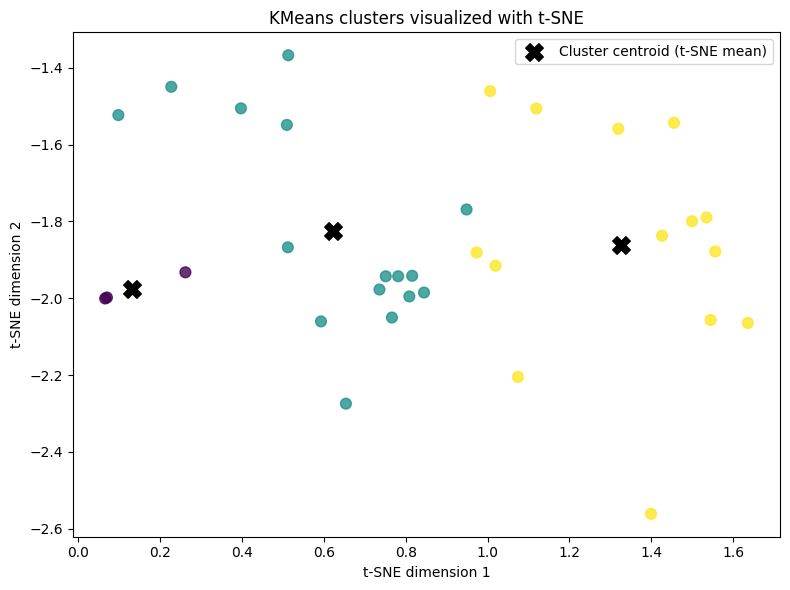

/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


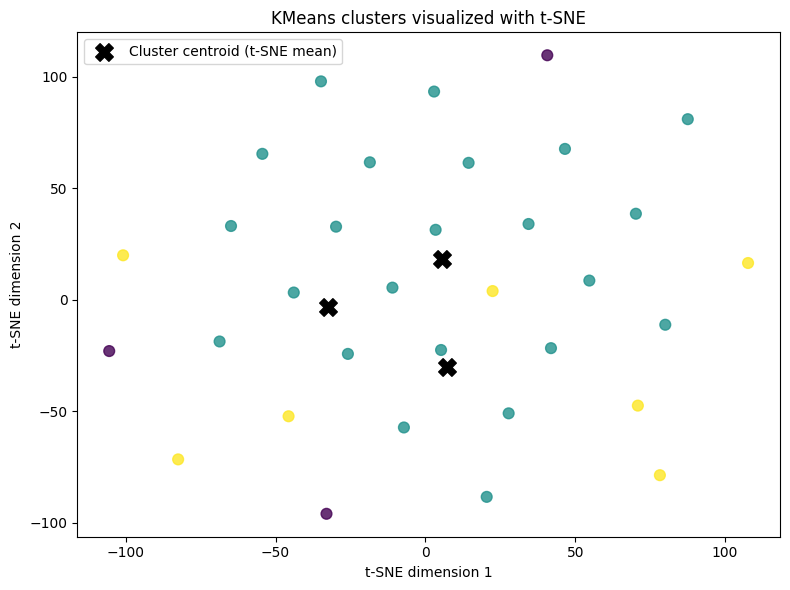

/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/.venv_predictions/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


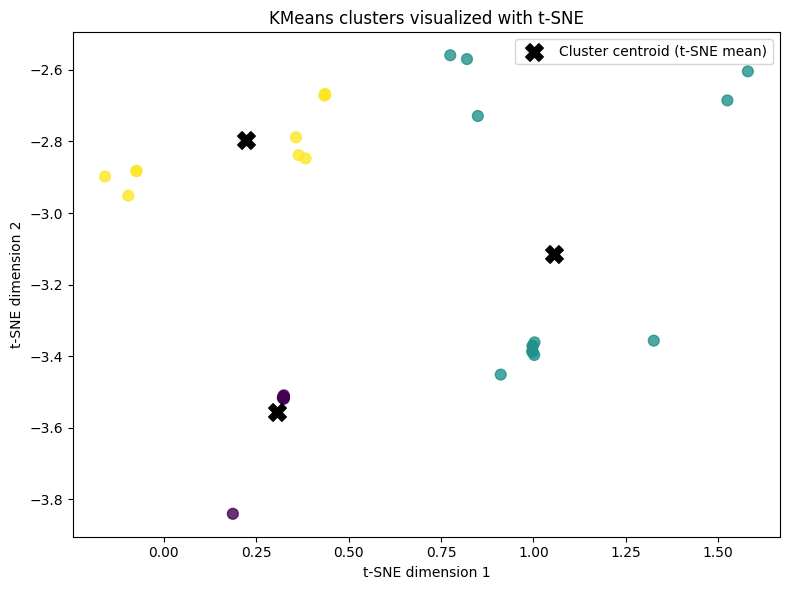

In [33]:

import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_clusters(embeddings, n_clusters, perplexity=30, random_state=0):
    """
    embeddings: array-like of shape (n_samples, n_features) or list of arrays
    n_clusters: int
    """
    # Ensure 2D NumPy array
    X = np.stack(embeddings) if isinstance(embeddings, list) else np.asarray(embeddings)
    if X.ndim != 2:
        raise ValueError(f"Expected 2D array for embeddings, got shape {X.shape}")

    # Fit KMeans on original space
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init="auto")
    labels = kmeans.fit_predict(X)

    # t-SNE to 2D for visualization
    tsne_2d = TSNE(
        n_components=2,
        learning_rate='auto',
        init='random',
        perplexity=perplexity,
        random_state=random_state
    ).fit_transform(X)

    # Compute "centers" in t-SNE space by averaging points per cluster
    tsne_centers = np.vstack([
        tsne_2d[labels == k].mean(axis=0) for k in range(n_clusters)
    ])

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_2d[:, 0], tsne_2d[:, 1], c=labels, cmap='viridis', s=60, alpha=0.8)
    plt.scatter(tsne_centers[:, 0], tsne_centers[:, 1], c='black', s=160, marker='X', label='Cluster centroid (t-SNE mean)')
    plt.title('KMeans clusters visualized with t-SNE')
    plt.xlabel('t-SNE dimension 1')
    plt.ylabel('t-SNE dimension 2')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example call:
plot_clusters(list(df['Source Embedding'].values), n_clusters=3)
plot_clusters(list(df['Target Embedding'].values), n_clusters=3)
plot_clusters(list(df['Date Embedding'].values), n_clusters=3)